# 3.	Perform clustering analysis on the telecom data set. The data is a mixture of both categorical and numerical data. It consists of the number of customers who churn out. Derive insights and get possible information on factors that may affect the churn decision. Refer to Telco_customer_churn.xlsx dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [3]:
df = pd.read_excel(r"C:\Users\ali umar hasan\Desktop\data science\Dataset_Assignment Clustering\Telco_customer_churn.xlsx")

In [4]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [6]:
def norm_func(i):   #crearing a normalization function 
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
from sklearn.preprocessing import normalize

In [9]:
df.iloc[:,:].head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [19]:

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:, 24:])
df_norm.describe() 


,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967
std,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859
50%,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551
75%,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [21]:
len(df.columns)

30

In [22]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [24]:
df_norm.head()

,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202
1,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855
2,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013
3,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680
4,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652


In [25]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

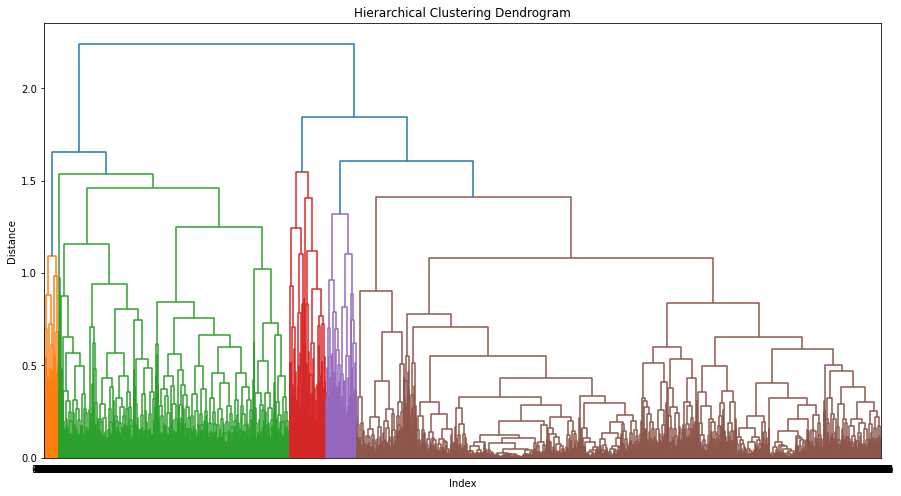

In [31]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()


In [43]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

df['clust'] = cluster_labels # creating a new column and assigning it to new column 

df1 = df.iloc[:, [7,0,1,2,3,4,5,6]]

In [44]:
df1.head()

,Offer,Phone Service,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months
0,None,No,8779-QRDMV,1,Q3,No,0,1
1,Offer E,Yes,7495-OOKFY,1,Q3,Yes,1,8
2,Offer D,Yes,1658-BYGOY,1,Q3,No,0,18
3,Offer C,Yes,4598-XLKNJ,1,Q3,Yes,1,25
4,Offer C,Yes,4846-WHAFZ,1,Q3,Yes,1,37


In [45]:
df.head()

,Phone Service,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,clust
0,No,8779-QRDMV,1,Q3,No,0,1,None,1
1,Yes,7495-OOKFY,1,Q3,Yes,1,8,Offer E,1
2,Yes,1658-BYGOY,1,Q3,No,0,18,Offer D,2
3,Yes,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,2
4,Yes,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,1


NameError: name 'data' is not defined